In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
path ='/content/drive/My Drive/ML Course/Assignment 3'
os.chdir(path)

In [0]:
# import needed librarries:
import csv
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support



## ** 1 & 2- Exploring Data & Fill Empty Fields &Visualization **

---





*  Read data from  csv files  &  Store it in train and test 
*  Compine all data together under name all_data for analysis reasons.
* Print data size information.



**Note:**
* Since the test data provided from Kaggle are not labeld, we can't evaluate it outside Kaggle.. So I will use the train data provided by Kaggle as train data and validation data

In [0]:

from sklearn.model_selection import train_test_split

kaggletrain = pd.read_csv('dataset/train.csv')
'''
train , valid = train_test_split(kaggletrain, test_size=0.2)

export_csv = train.to_csv (r'dataset/train2.csv', index = None, header=True) 
export_csv = valid.to_csv (r'dataset/valid.csv', index = None, header=True) 
'''

"\ntrain , valid = train_test_split(kaggletrain, test_size=0.2)\n\nexport_csv = train.to_csv (r'dataset/train2.csv', index = None, header=True) \nexport_csv = valid.to_csv (r'dataset/valid.csv', index = None, header=True) \n"

In [0]:

train = pd.read_csv('dataset/train2.csv')
valid = pd.read_csv('dataset/valid.csv')
test = pd.read_csv('dataset/test.csv')



all_data = [train, valid, test]

print('Train data entries number = ', train.shape[0])
print('Valid data entries number = ', valid.shape[0])
print('Number of features = ', train.shape[1])

print("\nFirst five rows of train data are: ")
train.head(5)



Train data entries number =  712
Valid data entries number =  179
Number of features =  12

First five rows of train data are: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,365,0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.5000,NaN,Q
1,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S
2,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
3,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
4,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S


** Explore the  train and valida data features **
* It shows the data type of each feature.
* It's also show thw number of values for each feature .. we have missing values for Age, Cabin, and Embarked features 

In [0]:
print (kaggletrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


**More details about each attribute using describe**
* count, mean, std, min, and max are clear fro sure.
* The 25%, 50%, and 75% rows show the corresponding percentiles
* The percentile indicates the value below which a given percentage of observations in a group of observations falls.


In [0]:
kaggletrain.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 ** To know how many missing values for each feature in the train data **
 

In [0]:
nullvalue = kaggletrain.isnull().sum() 
print(nullvalue)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Explore the test data features**

* It shows the data type of each feature.
* It's also show thw number of values for each feature .. we have missing values for Age and Cabin features

In [0]:
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [0]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


 ** To know how many missing values for each feature in the test data **

 

In [0]:
testnullvalue = test.isnull().sum()
print(testnullvalue)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


** Understand features and relations in train data **



---



** Survived Class **
* 0 = No, 1 = Yes
* Number of survived & unsurvived  (died) in train data 



0    433
1    279
Name: Survived, dtype: int64



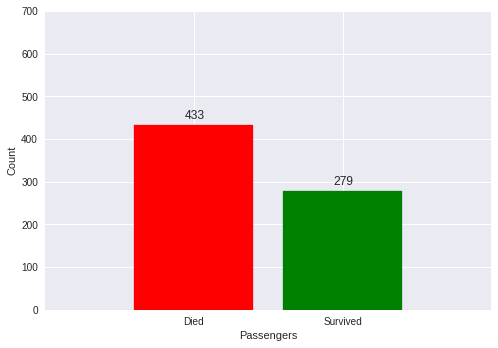

In [0]:
survived_values_count = train['Survived'].value_counts()
print(survived_values_count)
print()


x = ('Died','Survived')
x_pos = np.arange(len(x))
survived_values_count =survived_values_count.iloc[:].values

barlist = plt.bar(x_pos, survived_values_count, align='center')
plt.xticks(x_pos, x)
plt.xlabel('Passengers')
plt.ylabel('Count')
plt.xlim(-1, 2)
plt.ylim(0, 700)
barlist[0].set_color('r')
barlist[1].set_color('g')

plt.text(-(0.25/4), survived_values_count[0]+15, str(survived_values_count[0]))
plt.text(1-(0.25/4), survived_values_count[1]+15, str(survived_values_count[1]))

plt.show()



**Lets start with features with no missing values**

**Pclass Feature**
* i.e. Ticket class	
* 1 = 1st, 2 = 2nd, 3 = 3rd
* Notice that number of passengers of each class is not equal, 3rd class has the more passengers and more died!
* From the plots below, it's clear that as the Pclass increases (1st is the heighest) the percentage of survive is increased! Thats logical since higher class have better places in the ship I think! 


Each class count:
3    390
1    169
2    153
Name: Pclass, dtype: int64

Percenatge of Survived for each class:
   Pclass  Survived
0       1  0.644970
1       2  0.450980
2       3  0.258974



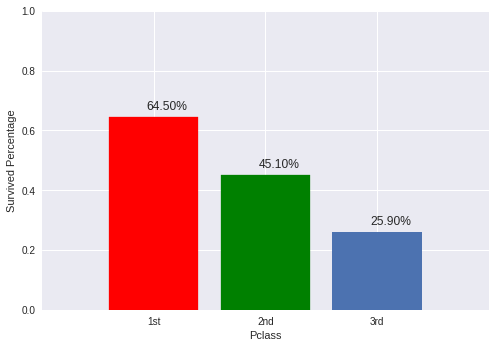

In [0]:
# pclass feature
pclass_values_count = train['Pclass'].value_counts()
print("Each class count:")
print(pclass_values_count)
print()

# percentage of survived of each class
survived_values_Percent= train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
print("Percenatge of Survived for each class:")
print(survived_values_Percent)

print()

pclass = ('1st', '2nd', '3rd')
x_pos = np.arange(len(pclass))
survicedPercent =survived_values_Percent.iloc[:,1].values
 
barlist = plt.bar(x_pos, survicedPercent, align='center')
plt.xticks(x_pos, pclass)
plt.xlabel('Pclass')
plt.ylabel('Survived Percentage')
plt.xlim(-1, 3)
plt.ylim(0, 1)
barlist[0].set_color('r')
barlist[1].set_color('g')

text1 = str("%.2f" % (survicedPercent[0]*100))
text2 = str("%.2f" % (survicedPercent[1]*100))
text3 = str("%.2f" % (survicedPercent[2]*100))

plt.text(-(0.25/4), survicedPercent[0]+0.025,text1+"%" )
plt.text(1-(0.25/4), survicedPercent[1]+0.025,text2+"%" )
plt.text(2-(0.25/4), survicedPercent[2]+0.025,text3+"%" )

plt.show()



**Sex Feature**
* Female
* Male
* Number of males passnegers is more than female passengers.
* From the plots below, the survived females more than survived males.

Each Sex count:
male      455
female    257
Name: Sex, dtype: int64

      Sex  Survived
0  female  0.743191
1    male  0.193407



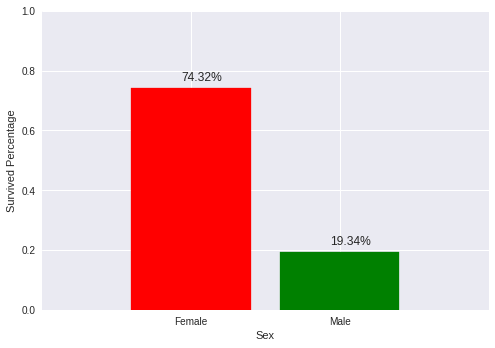

In [0]:
sex_values_count = train['Sex'].value_counts()
print("Each Sex count:")
print(sex_values_count)
print()

survived_values_Percent = train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
print(survived_values_Percent)
print()

sex = ('Female','Male')
x_pos = np.arange(len(sex))
survicedPercent =survived_values_Percent.iloc[:,1].values
 
barlist = plt.bar(x_pos, survicedPercent, align='center')
plt.xticks(x_pos, sex)
plt.xlabel('Sex')
plt.ylabel('Survived Percentage')
plt.xlim(-1, 2)
plt.ylim(0, 1)
barlist[0].set_color('r')
barlist[1].set_color('g')

text1 = str("%.2f" % (survicedPercent[0]*100))
text2 = str("%.2f" % (survicedPercent[1]*100))

plt.text(-(0.25/4), survicedPercent[0]+0.025,text1+"%" )
plt.text(1-(0.25/4), survicedPercent[1]+0.025,text2+"%" )

plt.show()

**sibsp Feature**
* Num of siblings / spouses aboard the Titanic
* range from 0 to 4 and few values of 5 & 8 so percent of them nearly zero
* most of the passengers has no sibsp, and some of them has 1 sibsp.
* The plots below shows the percentage of each sibsp and survived 


Each SibSp count:
0    479
1    168
2     23
4     16
3     15
8      6
5      5
Name: SibSp, dtype: int64

   SibSp  Survived
0      0  0.354906
1      1  0.547619
2      2  0.434783
3      3  0.266667
4      4  0.187500
5      5  0.000000
6      8  0.000000



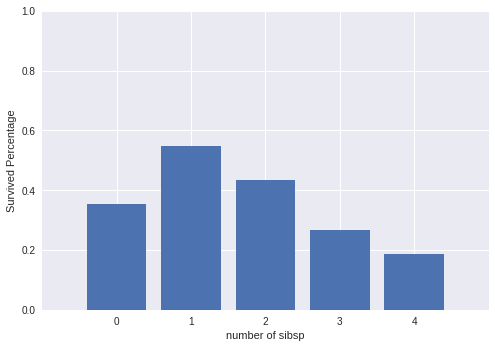

In [0]:
sibsp_values_count = train['SibSp'].value_counts()
print("Each SibSp count:")
print(sibsp_values_count)
print()

survived_values_Percent = train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()
print(survived_values_Percent)
print()

sibsp = ('0', '1','2','3','4')
x_pos = np.arange(len(sibsp))
survicedPercent =survived_values_Percent.iloc[:,1].values[0:len(sibsp)]
 
barlist = plt.bar(x_pos, survicedPercent, align='center')
plt.xticks(x_pos, sibsp)
plt.xlabel('number of sibsp')
plt.ylabel('Survived Percentage')
plt.xlim(-1,len(sibsp) )
plt.ylim(0, 1)

plt.show()

**Parch Feature**
* Num of parents / children aboard the Titanic
* range from 0 to 5, few values of 3-5 so percent of them nearly zero
* most of the passengers has no Parch, and some of them has 1 Parch.
* The plots below shows the percentage of each Parch and survived 


Each Parch count:
0    537
1     99
2     65
5      4
3      4
4      2
6      1
Name: Parch, dtype: int64

   Parch  Survived
0      0  0.355680
1      1  0.555556
2      2  0.461538
3      3  0.500000
4      4  0.000000
5      5  0.250000
6      6  0.000000



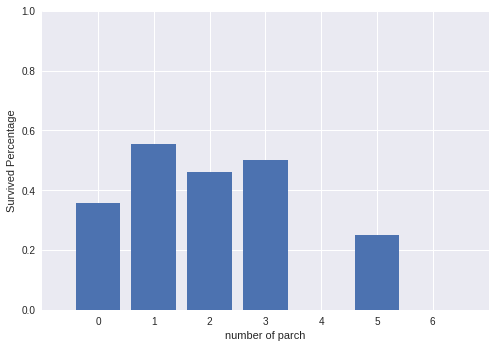

In [0]:
parch_values_count = train['Parch'].value_counts()
print("Each Parch count:")
print(parch_values_count)
print()

survived_values_Percent = train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()
print(survived_values_Percent)
print()

parch = ('0', '1','2','3','4' ,'5','6')
x_pos = np.arange(len(parch))
survicedPercent =survived_values_Percent.iloc[:,1].values
 
barlist = plt.bar(x_pos, survicedPercent, align='center')
plt.xticks(x_pos, parch)
plt.xlabel('number of parch')
plt.ylabel('Survived Percentage')
plt.xlim(-1,len(parch) )
plt.ylim(0, 1)

plt.show()

**Before continue in other features, lets stop here for a while**
* ** From the previos two features sibsp & parch .. we can introcude a new feature with name "Family size"!**

   FamilySize  Survived
0           1  0.317647
1           2  0.558140
2           3  0.569620
3           4  0.720000
4           5  0.214286
5           6  0.117647
6           7  0.363636
7           8  0.000000
8          11  0.000000



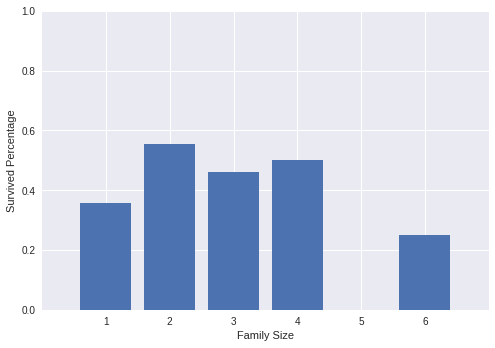

In [0]:
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1  # +1 the passenger self
    
family_values_Percent = train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()
print(family_values_Percent)
print()

family= [1,2,3,4,5,6]
family = [str(i) for i in family]

x_pos = np.arange(len(family))
survicedPercent =survived_values_Percent.iloc[:,1].values[0:len(family)]
 
barlist = plt.bar(x_pos, survicedPercent, align='center')
plt.xticks(x_pos, family)
plt.xlabel('Family Size')
plt.ylabel('Survived Percentage')
plt.xlim(-1,len(family) )
plt.ylim(0, 1)

plt.show()

**We can add a new feature also from Family size featire , which is "isAlone" **
* isAlone is  a boolean feature, it true (i.e. 1) when the family size = 1 (the passenger himself only)
* Num of alone passnegers is more than not alone passengers, but the percenetge of survived of alone passngers is the less, this is maybe an indicate  for a help between families rather than others!

Each IsAlone count:
1    425
0    287
Name: IsAlone, dtype: int64

   IsAlone  Survived
0        0  0.501742
1        1  0.317647



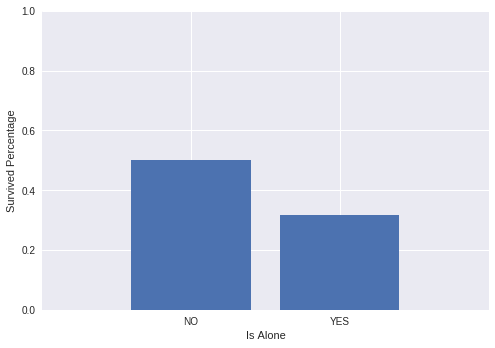

In [0]:
for dataset in all_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    

isalaone_values_count = train['IsAlone'].value_counts()
print("Each IsAlone count:")
print(isalaone_values_count)
print()
   
survived_values_Percent = train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()
print(survived_values_Percent)
print()

x = ['NO', 'YES']

x_pos = np.arange(len(x))
survicedPercent =survived_values_Percent.iloc[:,1].values
 
barlist = plt.bar(x_pos, survicedPercent, align='center')
plt.xticks(x_pos, x)
plt.xlabel('Is Alone')
plt.ylabel('Survived Percentage')
plt.xlim(-1,len(x) )
plt.ylim(0, 1)

plt.show()

**Embarked Feature**

Each Embark count:
S    507
C    137
Q     67
Name: Embarked, dtype: int64

  Embarked  Survived
0        C  0.540146
1        Q  0.388060
2        S  0.351085



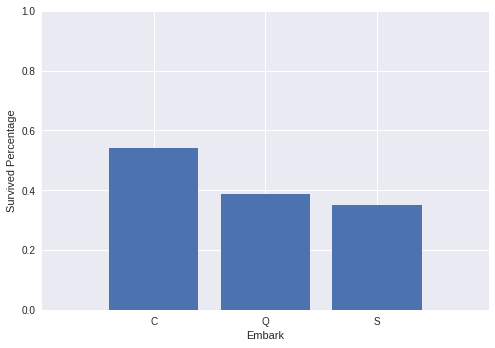

In [0]:
embark_values_count = train['Embarked'].value_counts()
print("Each Embark count:")
print(embark_values_count)
print()
   
survived_values_Percent = train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
print(survived_values_Percent)
print()

em = ['C','Q','S']

x_pos = np.arange(len(em))
survicedPercent =survived_values_Percent.iloc[:,1].values
 
barlist = plt.bar(x_pos, survicedPercent, align='center')
plt.xticks(x_pos, em)
plt.xlabel('Embark')
plt.ylabel('Survived Percentage')
plt.xlim(-1,len(em) )
plt.ylim(0, 1)

plt.show()

** But there is 2 missing values in the Embarked train data, lets fill it with S since its the most repeated( based on count not survived) and again get the results and plots**

Each Embark count:
S    508
C    137
Q     67
Name: Embarked, dtype: int64

  Embarked  Survived
0        C  0.540146
1        Q  0.388060
2        S  0.352362



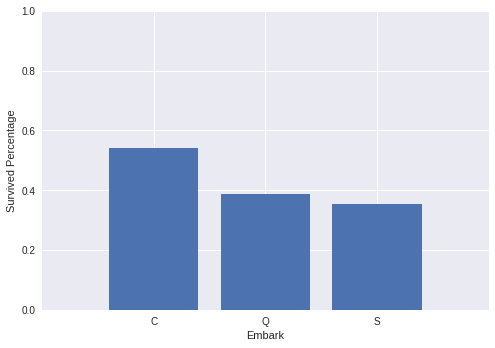

In [0]:
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

embark_values_count = train['Embarked'].value_counts()
print("Each Embark count:")
print(embark_values_count)
print()
   
survived_values_Percent = train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
print(survived_values_Percent)
print()

em = ['C','Q','S']

x_pos = np.arange(len(em))
survicedPercent =survived_values_Percent.iloc[:,1].values
 
barlist = plt.bar(x_pos, survicedPercent, align='center')
plt.xticks(x_pos, em)
plt.xlabel('Embark')
plt.ylabel('Survived Percentage')
plt.xlim(-1,len(em) )
plt.ylim(0, 1)

plt.show()

**Cabin Feature**
* There are many cabin values (148 value), max cabin passengers are 4 and 3 .. so there is no  big difference between cabins.
* There are big number of missing cabin values (687 in train data and 327 in test data)
* Fill missing values randomly from all avilabale cabin values
* Will not plot it as aplot for a148 value will not be clear.
* We can't categorize here, its not  numbers.

In [0]:
#fill missings
for dataset in all_data:
    dataset['Cabin'] = dataset['Cabin'].fillna(lambda x: random.choice(df[df[column] != np.nan]['Cabin']))
    
cabin_values_count = train['Cabin'].value_counts()

print(" Number of unique values of Cabin feature: ", len(cabin_values_count))

 Number of unique values of Cabin feature:  129


**Fare Feature**
* There are 222 value for fare features in train data
* No missing values in train data, just one missing value in test data,  fill it with median value 
* Categorize Fare feature, for example for 4 categories, nearly equal number of entries in each category
* The plots below shows that higher fare categories have a higher survived percentage!

 Number of unique values of Fare feature:  228

Each Fare Category count:

(-0.001, 7.925]      188
(14.454, 31.275]     180
(31.275, 512.329]    174
(7.925, 14.454]      170
Name: CategoricalFare, dtype: int64

     CategoricalFare  Survived
0    (-0.001, 7.925]  0.228723
1    (7.925, 14.454]  0.300000
2   (14.454, 31.275]  0.444444
3  (31.275, 512.329]  0.603448



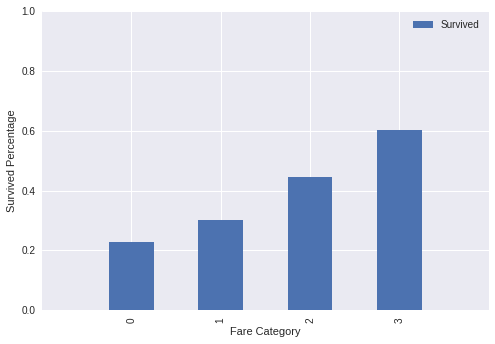

In [0]:
fair_values_count = train['Fare'].value_counts()
print(" Number of unique values of Fare feature: ",len(fair_values_count))
print()

# fill missings
for dataset in all_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())


# categorize fare into 4 categories (equal number of entries in each category)
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)

fare_values_count = train['CategoricalFare'].value_counts()
print("Each Fare Category count:")
print()
print(fare_values_count)
print()
   
survived_values_Percent = train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean()
print(survived_values_Percent)
print()

survived_values_Percent.plot(kind='bar')


plt.xlabel('Fare Category')
plt.ylabel('Survived Percentage')
plt.xlim(-1, 4 )
plt.ylim(0, 1)

plt.show()
    

**Age Feature**
* Age has 88 unique value.
* There area 177 missing value in train data, and 86 value in test data.


 Number of unique values of Age feature:  81

don't worry about this warrning


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


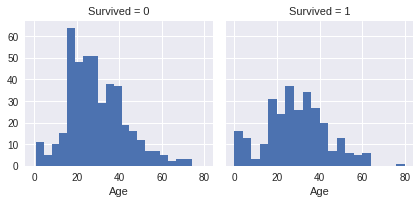

In [0]:
# count of each age value 
age_values_count = train['Age'].value_counts()
print(" Number of unique values of Age feature: ",len(age_values_count))
print()

print("don't worry about this warrning")
# generate random numbers between (mean - std) and (mean + std).
for dataset in all_data:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum() # num of missing values in all data (train+test)

    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

    
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)    

** Categorize Age feature values into 5 categories for example **

Each Age Category count:

(-0.001, 18.0]    155
(24.0, 32.0]      153
(32.0, 40.0]      141
(18.0, 24.0]      135
(40.0, 80.0]      128
Name: CategoricalAge, dtype: int64

   CategoricalAge  Survived
0  (-0.001, 18.0]  0.419355
1    (18.0, 24.0]  0.348148
2    (24.0, 32.0]  0.385621
3    (32.0, 40.0]  0.418440
4    (40.0, 80.0]  0.382812



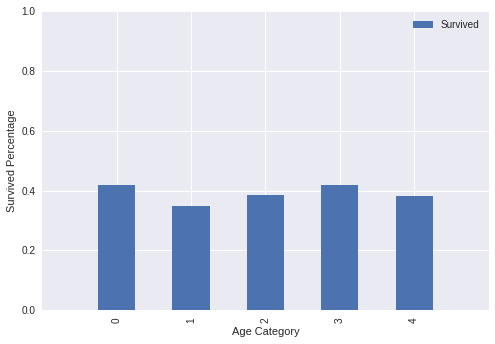

In [0]:
#categorize age into 5 range

train['CategoricalAge'] = pd.qcut(train['Age'], 5)

age_values_count = train['CategoricalAge'].value_counts()
print("Each Age Category count:")
print()

print(age_values_count)
print()
   
survived_values_Percent = train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean()
print(survived_values_Percent)
print()

survived_values_Percent.plot(kind='bar')


plt.xlabel('Age Category')
plt.ylabel('Survived Percentage')
plt.xlim(-1, 5 )
plt.ylim(0, 1)

plt.show()
    

**Name Feature**
 * We can  benifit from the name by extract the title (nickname) ; mr , ms, etc


In [0]:
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     5
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    33
Miss         149     0
Mlle           2     0
Mme            1     0
Mr             0   403
Mrs          102     0
Rev            0     6
Sir            0     1


** We group it as female and male to make sure that its a correct information **
* Mr, Mrs, Miss, and Master have the most repeted values.
* Mme and Mlle in French are same as Mrs and Ms in English .. so convet them.
* Group the rest of titles in one title 'Rare'

    Title  Survived
0  Master  0.515152
1    Miss  0.701987
2      Mr  0.163772
3     Mrs  0.796117
4    Rare  0.363636



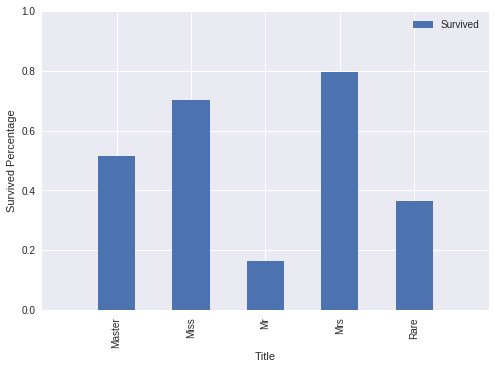

In [0]:
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


survived_values_Percent = train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
print(survived_values_Percent)
print()

survived_values_Percent.plot(kind='bar')
titles = [ 'Master', 'Miss', 'Mr', 'Mrs', 'Rare' ]

x_pos = np.arange(len(titles))
plt.xticks(x_pos, titles)


plt.xlabel('Title')
plt.ylabel('Survived Percentage')
plt.xlim(-1, 5 )
plt.ylim(0, 1)

plt.show()

** Note: Passenger Id & Tickets are not useful to study .. there are just numbers **



---

---



---





**Corelation**
* The correlation coefficient ranges from –1 to 1
* When it is close to 1, it means that there is a strong positive correlation.
* When the coefficient is close to –1, it means that there is a strong negative correlation.
* zero mean that there is no linear correlation
* From the results below its shown:
 * High positive correlation between SibSp with FamilySize & Parch with Family Size .. thats logical since Family Size produced from them
  * Negative correlation between FamilySize with IsAlone
  * Negative correlation between Pclass with Fare


In [0]:
corr_matrix = train.corr()
print(corr_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.023992 -0.021641  0.038051 -0.076137  0.016032   
Survived       -0.023992  1.000000 -0.327950 -0.028511 -0.048018  0.065519   
Pclass         -0.021641 -0.327950  1.000000 -0.281380  0.103237  0.030936   
Age             0.038051 -0.028511 -0.281380  1.000000 -0.251994 -0.177716   
SibSp          -0.076137 -0.048018  0.103237 -0.251994  1.000000  0.442701   
Parch           0.016032  0.065519  0.030936 -0.177716  0.442701  1.000000   
Fare            0.020500  0.253014 -0.555050  0.047360  0.170167  0.225222   
FamilySize     -0.044791 -0.001613  0.086055 -0.259185  0.902330  0.785969   
IsAlone         0.065609 -0.184983  0.127939  0.183713 -0.589117 -0.586800   

                 Fare  FamilySize   IsAlone  
PassengerId  0.020500   -0.044791  0.065609  
Survived     0.253014   -0.001613 -0.184983  
Pclass      -0.555050    0.086055  0.127939  
Age          0.047360   -0.259185  

** The following figures are a scate plots that show the relations between features **
* If you look on each plot of each feature with itself (diagonla figures) It shows the relation with Survived Class

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


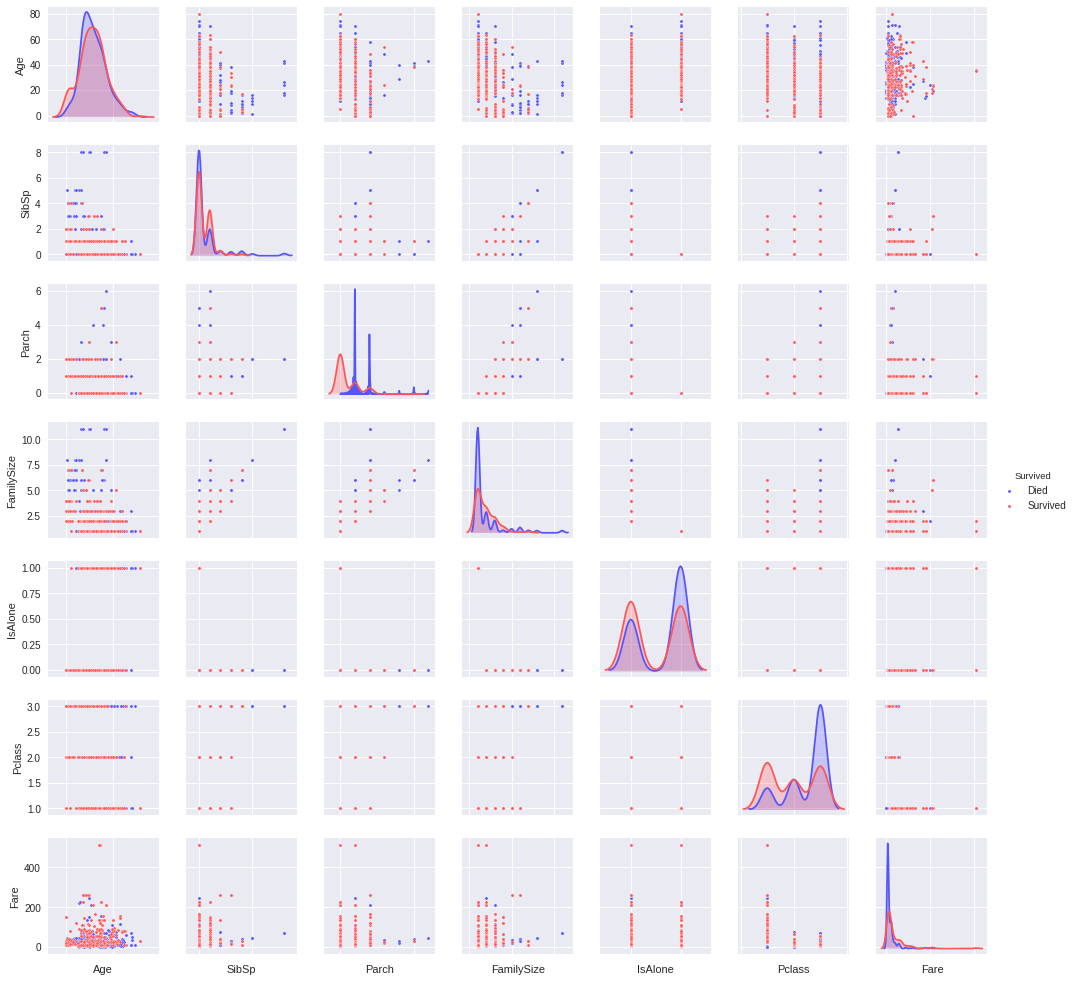

In [0]:
temp = train.copy()
temp["Survived"][temp["Survived"]==1] = "Survived"
temp["Survived"][temp["Survived"]==0] = "Died"

g = sns.pairplot(temp[[ u'Sex', u'Title',  u'Age',  u'SibSp', u'Parch', u'FamilySize', u'IsAlone' , u'Pclass', u'Fare', u'Embarked',  u'Survived']], hue='Survived', palette = 'seismic',size=2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])



---

> > >>**The End of Exploring Features, Filling Missing Values and Plotting**
>>>>** (Point 1 & 2 From  Assignment 3)**


---



**  Map  features into numerical values**

In [0]:
for dataset in all_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']= 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 19, 'Age']= 0
    dataset.loc[(dataset['Age'] > 19) & (dataset['Age'] <= 25), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 31), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 31) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[dataset['Age'] > 40, 'Age']= 4
    dataset['Age'] = dataset['Age'].astype(int)


In [0]:
newtrain = train.copy()
newvalid = valid.copy()
newtest = test.copy()

In [0]:
print(newtrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 17 columns):
PassengerId        712 non-null int64
Survived           712 non-null int64
Pclass             712 non-null int64
Name               712 non-null object
Sex                712 non-null int64
Age                712 non-null int64
SibSp              712 non-null int64
Parch              712 non-null int64
Ticket             712 non-null object
Fare               712 non-null int64
Cabin              712 non-null object
Embarked           712 non-null int64
FamilySize         712 non-null int64
IsAlone            712 non-null int64
CategoricalFare    712 non-null category
CategoricalAge     712 non-null category
Title              712 non-null int64
dtypes: category(2), int64(12), object(3)
memory usage: 85.0+ KB
None


##**3-Drop non-useful Features**

---


* Features with no  importance (here passenger IDs, Tickets, Name)
* Collinear (highly correlated) features (here SibSp, Parch)
* Features with low importance (here Cabin)
* Note: Drop Categorical  Age & Fare since replaced with numbers in original features in the previous step





In [0]:
# Feature selection
drop_elements = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
newtrain = newtrain.drop(drop_elements, axis = 1)
newtrain = newtrain.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

newvalid = newvalid.drop(drop_elements, axis = 1)

newtest  = newtest.drop(drop_elements, axis = 1)

In [0]:
print(newtrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
Survived      712 non-null int64
Pclass        712 non-null int64
Sex           712 non-null int64
Age           712 non-null int64
Fare          712 non-null int64
Embarked      712 non-null int64
FamilySize    712 non-null int64
IsAlone       712 non-null int64
Title         712 non-null int64
dtypes: int64(9)
memory usage: 50.1 KB
None


In [0]:
newtrain.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,1,2,2,2,2,0,1
1,1,2,0,2,2,0,2,0,3
2,0,1,1,3,3,0,2,0,1
3,0,3,0,0,1,0,2,0,2
4,0,1,1,2,3,0,2,0,1


In [0]:
newvalid.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,0,2,1,1,3,0,1,1,1
1,0,1,1,1,3,1,1,1,1
2,1,3,0,2,2,1,3,0,3
3,1,2,0,0,2,0,3,0,2
4,0,3,1,2,0,1,1,1,1


In [0]:
newtest.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title
0,3,1,3,0,2,1,1,1
1,3,0,4,0,0,2,0,3
2,2,1,4,1,2,1,1,1
3,3,1,2,1,0,1,1,1
4,3,0,1,1,0,3,0,3


**Correlation between final features**

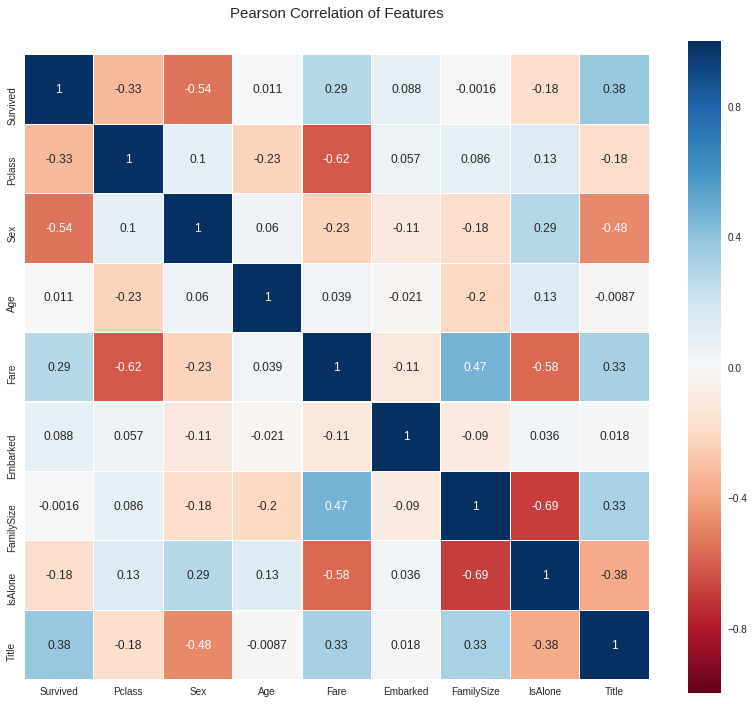

In [0]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(newtrain.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

##**4- Rank features using Random Forest**

---



Its shown below the order of important features as follow:


1.  Title
2.  Sex
3. Age
4. Pclass
5. FamilySize
6. Fare
7. Embarked
8. IsAlone



In [0]:
x_train= newtrain.iloc[:,1:]
y_train=newtrain["Survived"]

x_valid= newvalid.iloc[:,1:]
y_valid= newvalid["Survived"]


x_test= newtest.iloc[:,:]

In [0]:
features_labels=['Pclass',	'Sex',	'Age',	'Fare',	'Embarked',	'FamilySize',	'IsAlone',	'Title']

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(x_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(features_labels, clf.feature_importances_):
    print(feature)

('Pclass', 0.1273796709129032)
('Sex', 0.19265805247122747)
('Age', 0.1531402157130543)
('Fare', 0.11713742986802013)
('Embarked', 0.0526442630897014)
('FamilySize', 0.11653961849298335)
('IsAlone', 0.01980910728498231)
('Title', 0.2206916421671278)




---

> > >>**The End of Drop non-useful features & Rank features **
>>>>** (Point 3 & 4 From  Assignment 3)**


---



##**5- Classifications using Scikit-learn**

---



###** a- SVM**

First step is to apply data scaling before use SVM
We use standard scalar from sklearn, which is: new_value = (old_value - mean)/std

** 1- SVM with Linear Kernal **

In [0]:
svm_a1 = Pipeline((("scaler", StandardScaler()),("linear_svc", LinearSVC(C=5))))
svm_a1.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

**2- SVM with polynomial kernal**

In [0]:
svm_a2 = Pipeline((("scaler", StandardScaler()),("svm_clf", SVC(kernel="poly", degree=5, C=5))))
svm_a2.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

**3- SVM with RBF kernal**

In [0]:
svm_a3 = Pipeline((("scaler", StandardScaler()), ("svm_clf", SVC(kernel="rbf", gamma=5, C=5))))
svm_a3.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])



---



###** b- NB **

In [0]:
# Gaussian Naive Bayes
nb_b = GaussianNB()
nb_b.fit(x_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)



---



### c- Logistic regression

In [0]:
lr_c = LogisticRegression(C=100)
lr_c.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)



---



###d- Decision tree

**Tree 1:**

In [0]:
# defaults: criterion= 'gini' , splitter='best' ,max_depth =None
dt_d1 = DecisionTreeClassifier()
dt_d1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Tree 2:**

In [0]:
# defaults: criterion= 'gini' , splitter='best' ,max_depth =None
dt_d2 = DecisionTreeClassifier(criterion= 'entropy')
dt_d2.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Tree 3:**

In [0]:

# defaults: criterion= 'gini' , splitter='best' ,max_depth =None
dt_d3 = DecisionTreeClassifier(splitter='random')
dt_d3.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

**Tree 4:**

In [0]:
# defaults: criterion= 'gini' , splitter='best' ,max_depth =None
dt_d4 = DecisionTreeClassifier(max_depth= 2)
dt_d4.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')



---



###e- Random Forest

In [0]:
param_grid = [{'n_estimators': [100, 250, 500,1000],'criterion': ['gini', 'entropy'], 'max_features': [2, 4, 6, 8],'max_depth': [None, 2, 4, 6, 8]}]

rf = RandomForestClassifier()
rf_e = GridSearchCV(rf, param_grid, cv=5)
rf_e.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [100, 250, 500, 1000], 'criterion': ['gini', 'entropy'], 'max_features': [2, 4, 6, 8], 'max_depth': [None, 2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# best parameters found are 
print(rf_e.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 2, 'n_estimators': 100}




---



###f- Gradient Boosting Classifier

In [0]:
param_grid = [{'n_estimators': [100, 250, 500, 1000],'learning_rate': [0.1 ,1.0,2.0],'max_depth': [None, 2, 4, 6, 8]}]

gb = GradientBoostingClassifier()
gb_f = GridSearchCV(gb, param_grid, cv=5)
gb_f.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [100, 250, 500, 1000], 'learning_rate': [0.1, 1.0, 2.0], 'max_depth': [None, 2, 4, 6, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print(gb_f.best_params_)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 250}




---



###g- BaggingClassifier 

####BaggingClassifier_NB

In [0]:
nbbag_g = BaggingClassifier(GaussianNB(), n_estimators=500,max_samples=100, bootstrap=True,n_jobs=-1)
nbbag_g.fit(x_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)



---



####BaggingClassifier_DT

In [0]:
dtbag_g = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1000, bootstrap=True, n_jobs=-1)
dtbag_g.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)



---



###h- AdaBoosting

In [0]:
param_grid = [{'n_estimators': [100,250,500,1000],'learning_rate': [0.1 , 0.5, 1.0,2.0], 'algorithm': ['SAMME.R', 'SAMME'] }]

adab = AdaBoostClassifier(DecisionTreeClassifier())

adab_h = GridSearchCV(adab, param_grid, cv=5)
adab_h.fit(x_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [100, 250, 500, 1000], 'learning_rate': [0.1, 0.5, 1.0, 2.0], 'algorithm': ['SAMME.R', 'SAMME']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print(adab_h.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}




---



###i- Voting-Ensembling

In [0]:
voting_i = VotingClassifier(estimators=[('decison_tree1', dt_d1) ,('gradientBoost', gb_f) ,('AdaBoost', adab_h) , ('svm_poly', svm_a2), ('Bagging DT', dtbag_g)],voting='hard')
voting_i.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


VotingClassifier(estimators=[('decison_tree1', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fr...imators=1000, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)



---



###j- My Own Method (KNN)

In [0]:

param_grid = [{'n_neighbors': [1,3,5,7,9,11,13,15,17,19], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]

nbrs = KNeighborsClassifier()
knn_j = GridSearchCV(nbrs, param_grid, cv=5)
knn_j.fit(x_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print(knn_j.best_params_)

{'algorithm': 'brute', 'n_neighbors': 5}


###Voting from all models

In [0]:
voting_all = VotingClassifier(estimators=[('svm_linear', svm_a1),('svm_poly', svm_a2),('svm_rbf', svm_a3),
                                          ('naive bayes', nb_b), ('logistic regression',lr_c),
                                          ('decison_tree1', dt_d1) ,('decison_tree2', dt_d2),('decison_tree3', dt_d3), 
                                          ('random forest', rf_e), ('gradientBoost', gb_f) , ('Bagging DT', dtbag_g) , ('Bagging NB', nbbag_g),                                  
                                          ('AdaBoost', adab_h) ,('KNN', knn_j)],voting='hard')
voting_all.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit

VotingClassifier(estimators=[('svm_linear', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', pe...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)



---



---



---





---



---



---



##6- Comparsion (Evaluation)

#### Training Data Prediction Evaluation

In [0]:


train_pred_svm_a1= svm_a1.predict(x_train)
train_pred_svm_a2= svm_a2.predict(x_train)
train_pred_svm_a3= svm_a3.predict(x_train)

train_pred_nb_b= nb_b.predict(x_train)

train_pred_lr_c= lr_c.predict(x_train)

train_pred_dt_d1= dt_d1.predict(x_train)
train_pred_dt_d2= dt_d2.predict(x_train)
train_pred_dt_d3= dt_d3.predict(x_train)
train_pred_dt_d4= dt_d4.predict(x_train)

train_pred_rf_e= rf_e.predict(x_train)

train_pred_gb_f= gb_f.predict(x_train)


train_pred_nbbag_g = nbbag_g.predict(x_train)
train_pred_dtbag_g = dtbag_g.predict(x_train)

train_pred_adab_h = adab_h.predict(x_train)

train_pred_voting_i = voting_i.predict(x_train)

train_pred_knn_j = knn_j.predict(x_train)

train_pred_voting_all = voting_all.predict(x_train)


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/

In [0]:
train_results =[]

acc= round(accuracy_score(y_train, train_pred_svm_a1), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_svm_a1, average='micro')
train_results.append(["SVM_Linear", acc, p, r, f1])

acc= round(accuracy_score(y_train, train_pred_svm_a2), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_svm_a2, average='micro')
train_results.append(["SVM_Poly", acc, p, r, f1])

acc= round(accuracy_score(y_train, train_pred_svm_a1), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_svm_a1, average='micro')
train_results.append(["SVM_RBF", acc, p, r, f1])



acc= round(accuracy_score(y_train, train_pred_nb_b), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_nb_b, average='micro')
train_results.append(["Naive Bayes", acc, p, r, f1])


acc= round(accuracy_score(y_train, train_pred_lr_c), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_lr_c, average='micro')
train_results.append(["Logistic Regression", acc, p, r, f1])


acc= round(accuracy_score(y_train, train_pred_dt_d1), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_dt_d1, average='micro')
train_results.append(["DecisionTree -1 ", acc, p, r, f1])

acc= round(accuracy_score(y_train, train_pred_dt_d2), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_dt_d2, average='micro')
train_results.append(["DecisionTree -2 ", acc, p, r, f1])

acc= round(accuracy_score(y_train, train_pred_dt_d3), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_dt_d3, average='micro')
train_results.append(["DecisionTree -3 ", acc, p, r, f1])


acc= round(accuracy_score(y_train, train_pred_dt_d4), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_dt_d4, average='micro')
train_results.append(["DecisionTree -4 ", acc, p, r, f1])



acc= round(accuracy_score(y_train, train_pred_rf_e), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_rf_e, average='micro')
train_results.append(["Random Forest", acc, p, r, f1])


acc= round(accuracy_score(y_train, train_pred_gb_f) , 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_gb_f, average='micro')
train_results.append(["Gradient Boost", acc, p, r, f1])

acc= round(accuracy_score(y_train, train_pred_nbbag_g), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_nbbag_g, average='micro')
train_results.append(["Bagging with NB", acc, p, r, f1])


acc= round(accuracy_score(y_train, train_pred_dtbag_g), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_dtbag_g, average='micro')
train_results.append(["Bagging with DT", acc, p, r, f1])


acc= round(accuracy_score(y_train, train_pred_adab_h), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_adab_h, average='micro')
train_results.append(["AdaBoost", acc, p, r, f1])



acc= round(accuracy_score(y_train, train_pred_voting_i), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_voting_i, average='micro')
train_results.append(["Voting", acc, p, r, f1])


acc= round(accuracy_score(y_train, train_pred_knn_j), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_knn_j, average='micro')
train_results.append(["KNN", acc, p, r, f1])


acc= round(accuracy_score(y_train, train_pred_voting_all), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_train, train_pred_voting_all, average='micro')
train_results.append(["Voting All", acc, p, r, f1])



In [0]:
from tabulate import tabulate
print("--------------> Training Data Results <--------------")
print("Classfier           Accurcy  Precision  Recall  F1Score")
print(tabulate(train_results))

--------------> Training Data Results <--------------
Classfier           Accurcy  Precision  Recall  F1Score
-------------------  ----  --------  --------  --------
SVM_Linear           0.8   0.800562  0.800562  0.800562
SVM_Poly             0.88  0.875     0.875     0.875
SVM_RBF              0.8   0.800562  0.800562  0.800562
Naive Bayes          0.79  0.787921  0.787921  0.787921
Logistic Regression  0.8   0.801966  0.801966  0.801966
DecisionTree -1      0.9   0.901685  0.901685  0.901685
DecisionTree -2      0.9   0.901685  0.901685  0.901685
DecisionTree -3      0.9   0.901685  0.901685  0.901685
DecisionTree -4      0.78  0.783708  0.783708  0.783708
Random Forest        0.87  0.865169  0.865169  0.865169
Gradient Boost       0.85  0.852528  0.852528  0.852528
Bagging with NB      0.79  0.789326  0.789326  0.789326
Bagging with DT      0.9   0.901685  0.901685  0.901685
AdaBoost             0.9   0.901685  0.901685  0.901685
Voting               0.9   0.901685  0.901685  0.9016

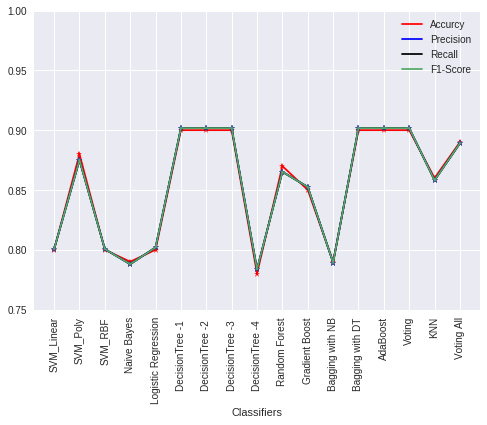

In [0]:
clas=[]
acc = []
p =[]
r =[]
f1=[]

for res in train_results:
  clas.append(res[0])
  acc.append(res[1])
  p.append(res[2])
  r.append(res[3])
  f1.append(res[4])


x_pos = np.arange(1,len(clas)+1)
plt.xticks(x_pos, clas,rotation=90)
plt.xlabel('Classifiers')
plt.ylim(0.75, 1)
plt.plot(x_pos, acc,'r*')
plt.plot(x_pos, acc, 'r', label='Accurcy')

plt.plot(x_pos, p,'b*')
plt.plot(x_pos, p, 'b', label='Precision')

plt.plot(x_pos, r,'k*')
plt.plot(x_pos, r, 'k', label='Recall')

plt.plot(x_pos, f1,'*')
plt.plot(x_pos, f1, label='F1-Score')

plt.legend()

plt.show()

#### Validation Data Prediction Evaluation

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


valid_pred_svm_a1= svm_a1.predict(x_valid)
valid_pred_svm_a2= svm_a2.predict(x_valid)
valid_pred_svm_a3= svm_a3.predict(x_valid)

valid_pred_nb_b= nb_b.predict(x_valid)

valid_pred_lr_c= lr_c.predict(x_valid)

valid_pred_dt_d1= dt_d1.predict(x_valid)
valid_pred_dt_d2= dt_d2.predict(x_valid)
valid_pred_dt_d3= dt_d3.predict(x_valid)
valid_pred_dt_d4= dt_d4.predict(x_valid)

valid_pred_rf_e= rf_e.predict(x_valid)

valid_pred_gb_f= gb_f.predict(x_valid)


valid_pred_nbbag_g = nbbag_g.predict(x_valid)
valid_pred_dtbag_g = dtbag_g.predict(x_valid)

valid_pred_adab_h = adab_h.predict(x_valid)

valid_pred_voting_i = voting_i.predict(x_valid)

valid_pred_knn_j = knn_j.predict(x_valid)

valid_pred_voting_all = voting_all.predict(x_valid)


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/

In [0]:
valid_results =[]

acc= round(accuracy_score(y_valid, valid_pred_svm_a1), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_svm_a1, average='micro')
valid_results.append(["SVM_Linear", acc, p, r, f1])

acc= round(accuracy_score(y_valid, valid_pred_svm_a2), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_svm_a2, average='micro')
valid_results.append(["SVM_Poly", acc, p, r, f1])

acc= round(accuracy_score(y_valid, valid_pred_svm_a1), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_svm_a1, average='micro')
valid_results.append(["SVM_RBF", acc, p, r, f1])



acc= round(accuracy_score(y_valid, valid_pred_nb_b), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_nb_b, average='micro')
valid_results.append(["Naive Bayes", acc, p, r, f1])


acc= round(accuracy_score(y_valid, valid_pred_lr_c), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_lr_c, average='micro')
valid_results.append(["Logistic Regression", acc, p, r, f1])


acc= round(accuracy_score(y_valid, valid_pred_dt_d1), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_dt_d1, average='micro')
valid_results.append(["DecisionTree -1 ", acc, p, r, f1])

acc= round(accuracy_score(y_valid, valid_pred_dt_d2), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_dt_d2, average='micro')
valid_results.append(["DecisionTree -2 ", acc, p, r, f1])

acc= round(accuracy_score(y_valid, valid_pred_dt_d3), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_dt_d3, average='micro')
valid_results.append(["DecisionTree -3 ", acc, p, r, f1])


acc= round(accuracy_score(y_valid, valid_pred_dt_d4), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_dt_d4, average='micro')
valid_results.append(["DecisionTree -4 ", acc, p, r, f1])



acc= round(accuracy_score(y_valid, valid_pred_rf_e), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_rf_e, average='micro')
valid_results.append(["Random Forest", acc, p, r, f1])


acc= round(accuracy_score(y_valid, valid_pred_gb_f) , 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_gb_f, average='micro')
valid_results.append(["Gradient Boost", acc, p, r, f1])

acc= round(accuracy_score(y_valid, valid_pred_nbbag_g), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_nbbag_g, average='micro')
valid_results.append(["Bagging with NB", acc, p, r, f1])


acc= round(accuracy_score(y_valid, valid_pred_dtbag_g), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_dtbag_g, average='micro')
valid_results.append(["Bagging with DT", acc, p, r, f1])


acc= round(accuracy_score(y_valid, valid_pred_adab_h), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_adab_h, average='micro')
valid_results.append(["AdaBoost", acc, p, r, f1])



acc= round(accuracy_score(y_valid, valid_pred_voting_i), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_voting_i, average='micro')
valid_results.append(["Voting", acc, p, r, f1])



acc= round(accuracy_score(y_valid, valid_pred_knn_j), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_knn_j, average='micro')
valid_results.append(["KNN", acc, p, r, f1])


acc= round(accuracy_score(y_valid, valid_pred_voting_all), 2)
[p, r, f1, _]=  precision_recall_fscore_support(y_valid, valid_pred_voting_all, average='micro')
valid.append(["Voting All", acc, p, r, f1])


/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,0
0,73.0,0.0,2.0,"Hood, Mr. Ambrose Jr",1.0,1.0,0.0,0.0,S.O.C. 14879,3.0,<function <lambda> at 0x7f67b9f221e0>,0.0,1.0,1.0,1.0,NaN
1,140.0,0.0,1.0,"Giglio, Mr. Victor",1.0,1.0,0.0,0.0,PC 17593,3.0,B86,1.0,1.0,1.0,1.0,NaN
2,256.0,1.0,3.0,"Touma, Mrs. Darwis (Hanne Youssef Razi)",0.0,2.0,0.0,2.0,2650,2.0,<function <lambda> at 0x7f67b9f221e0>,1.0,3.0,0.0,3.0,NaN
3,238.0,1.0,2.0,"Collyer, Miss. Marjorie ""Lottie""",0.0,0.0,0.0,2.0,C.A. 31921,2.0,<function <lambda> at 0x7f67b9f221e0>,0.0,3.0,0.0,2.0,NaN
4,355.0,0.0,3.0,"Yousif, Mr. Wazli",1.0,2.0,0.0,0.0,2647,0.0,<function <lambda> at 0x7f67b9f221e0>,1.0,1.0,1.0,1.0,NaN
5,264.0,0.0,1.0,"Harrison, Mr. William",1.0,3.0,0.0,0.0,112059,0.0,B94,0.0,1.0,1.0,1.0,NaN
6,224.0,0.0,3.0,"Nenkoff, Mr. Christo",1.0,3.0,0.0,0.0,349234,0.0,<function <lambda> at 0x7f67b9f221e0>,0.0,1.0,1.0,1.0,NaN
7,653.0,0.0,3.0,"Kalvik, Mr. Johannes Halvorsen",1.0,1.0,0.0,0.0,8475,1.0,<function <lambda> at 0x7f67b9f221e0>,0.0,1.0,1.0,1.0,NaN
8,512.0,0.0,3.0,"Webber, Mr. James",1.0,3.0,0.0,0.0,SOTON/OQ 3101316,1.0,<function <lambda> at 0x7f67b9f221e0>,0.0,1.0,1.0,1.0,NaN
9,358.0,0.0,2.0,"Funk, Miss. Annie Clemmer",0.0,3.0,0.0,0.0,237671,1.0,<function <lambda> at 0x7f67b9f221e0>,0.0,1.0,1.0,2.0,NaN


In [0]:
from tabulate import tabulate
print("--------------> Validation Data Results <--------------")
print("Classfier           Accurcy  Precision  Recall  F1Score")
print(tabulate(valid_results))

--------------> Validation Data Results <--------------
Classfier           Accurcy  Precision  Recall  F1Score
-------------------  ----  --------  --------  --------
SVM_Linear           0.82  0.815642  0.815642  0.815642
SVM_Poly             0.8   0.804469  0.804469  0.804469
SVM_RBF              0.82  0.815642  0.815642  0.815642
Naive Bayes          0.84  0.837989  0.837989  0.837989
Logistic Regression  0.82  0.815642  0.815642  0.815642
DecisionTree -1      0.87  0.865922  0.865922  0.865922
DecisionTree -2      0.85  0.854749  0.854749  0.854749
DecisionTree -3      0.84  0.843575  0.843575  0.843575
DecisionTree -4      0.8   0.798883  0.798883  0.798883
Random Forest        0.85  0.854749  0.854749  0.854749
Gradient Boost       0.84  0.843575  0.843575  0.843575
Bagging with NB      0.83  0.832402  0.832402  0.832402
Bagging with DT      0.83  0.826816  0.826816  0.826816
AdaBoost             0.85  0.854749  0.854749  0.854749
Voting               0.85  0.849162  0.849162  0

In [0]:
clas=[]
acc = []
p =[]
r =[]
f1=[]

for res in valid_results:
  clas.append(res[0])
  acc.append(res[1])
  p.append(res[2])
  r.append(res[3])
  f1.append(res[4])



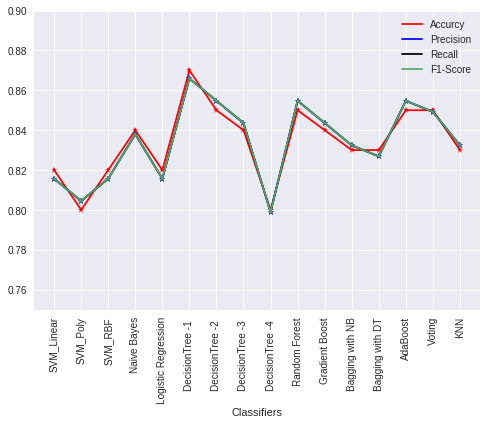

In [0]:

x_pos = np.arange(1,len(clas)+1)
plt.xticks(x_pos, clas,rotation=90)
plt.xlabel('Classifiers')
plt.ylim(0.75, 0.90)
plt.plot(x_pos, acc,'r*')
plt.plot(x_pos, acc, 'r', label='Accurcy')

plt.plot(x_pos, p,'b*')
plt.plot(x_pos, p, 'b', label='Precision')

plt.plot(x_pos, r,'k*')
plt.plot(x_pos, r, 'k', label='Recall')

plt.plot(x_pos, f1,'*')
plt.plot(x_pos, f1, label='F1-Score')

plt.legend()

plt.show()

##Test data evaluation on Kaggle!

I will use the best  models for test data predictions based on validation results ,which are:
* DT
* Random Forest
* Naive Bayes
* Voting All
* AdaBoost
* KNN


In [0]:
# dt 2
test_pred = dt_d1.predict(x_test)
test_results = []
for i in range(0,len(test)):
  test_results.append([test["PassengerId"][i], test_pred[i]])
  
prediction = pd.DataFrame(test_results, columns=['PassengerId', 'Survived']).to_csv('predictions/dt2.csv',index =False)


In [0]:
# randome forest
test_pred = rf_e.predict(x_test)
test_results = []
for i in range(0,len(test)):
  test_results.append([test["PassengerId"][i], test_pred[i]])
  
prediction = pd.DataFrame(test_results, columns=['PassengerId', 'Survived']).to_csv('predictions/rf2.csv',index =False)


In [0]:
# naive bayes
test_pred = nb_b.predict(x_test)
test_results = []
for i in range(0,len(test)):
  test_results.append([test["PassengerId"][i], test_pred[i]])
  
prediction = pd.DataFrame(test_results, columns=['PassengerId', 'Survived']).to_csv('predictions/nb_b.csv',index =False)


In [0]:
# knn
test_pred = knn_j.predict(x_test)
test_results = []
for i in range(0,len(test)):
  test_results.append([test["PassengerId"][i], test_pred[i]])
  
prediction = pd.DataFrame(test_results, columns=['PassengerId', 'Survived']).to_csv('predictions/knn2.csv',index =False)


In [0]:
# voting all
test_pred = voting_all.predict(x_test)
test_results = []
for i in range(0,len(test)):
  test_results.append([test["PassengerId"][i], test_pred[i]])
  
prediction = pd.DataFrame(test_results, columns=['PassengerId', 'Survived']).to_csv('predictions/votingall2.csv',index =False)


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [0]:
# knn
test_pred = adab_h.predict(x_test)
test_results = []
for i in range(0,len(test)):
  test_results.append([test["PassengerId"][i], test_pred[i]])
  
prediction = pd.DataFrame(test_results, columns=['PassengerId', 'Survived']).to_csv('predictions/adaboost2.csv',index =False)




---



##Kaggle Test Results
* DT2  ...  0.74162
* Random Forest .... 0.79904
* Naive Bayes ... 0.76555
* KNN  ... 0.76555
* Voting all .... 0.77990
*  AdaBoost .. 0.73684

So, Random Forest had the best score anmong this method and method 1




---

#The End :)